# Tarea - Ajuste de curvas

Ximena Arroyo Ruvalcaba

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [91]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

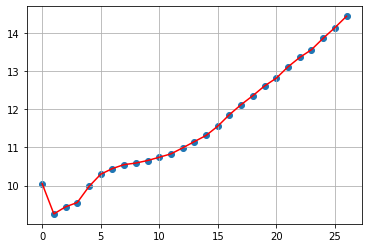

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 26, len(data))

plt.figure()
plt.scatter(x, data)
plt.plot(x, data, "r" )
plt.grid()

In [93]:
import scipy.optimize as opt

In [94]:
#Definimos un modelo f(x) = B0 + B1*x

In [95]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1]) #porque beta es tiene 2 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

In [96]:
# Construyendo matriz X 
ones = np.ones([len(data), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(data), -1]) # columna de factor x con m renglones y 1 columna


X_G1 = np.hstack((ones, x_1)) #amontonar en la matriz X (stack) en horizontal (h)
X_G1

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.]])

In [97]:
beta_inicial_G1 = np.random.rand(2) #vector aleatorio de 2 porque beta tiene 4 elementos
y = np.reshape(data, [len(data), -1])
funcion_de_costo(beta_inicial_G1, X_G1, y)

761.6296015835428

In [98]:
import scipy.optimize as opt
sol_G1 = opt.minimize(funcion_de_costo,
                  beta_inicial_G1,
                  args=(X_G1, y))
sol_G1

      fun: 2.3704889518145715
 hess_inv: array([[ 0.07010581, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([-5.21540642e-06, -2.95042992e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567598, 0.18667058])

In [99]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2
def funcion_de_costo2(beta, X, y):
    beta = np.reshape(beta, [3, -1]) #porque beta es tiene 4 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(data), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(data), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(data), -1])

X_G2 = np.hstack((ones, x_1, x_2)) #amontonar en la matriz X (stack) en horizontal (h)
X_G2

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.]])

In [100]:
beta_inicial_G2 = np.random.rand(3) #vector aleatorio de 3 porque beta tiene 4 elementos
y = np.reshape(data, [len(data), -1])
funcion_de_costo2(beta_inicial_G2, X_G2, y)

1781015.6585038789

In [101]:
import scipy.optimize as opt
sol_G2 = opt.minimize(funcion_de_costo2,
                  beta_inicial_G2,
                  args=(X_G2, y))
sol_G2

      fun: 0.8443845194031574
 hess_inv: array([[ 1.44224839e-01, -2.17568655e-02,  6.84172413e-04],
       [-2.17568655e-02,  4.57452414e-03, -1.64202366e-04],
       [ 6.84172413e-04, -1.64202366e-04,  6.31565880e-06]])
      jac: array([0.00000000e+00, 2.23517418e-08, 7.07805157e-07])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([9.59128645e+00, 7.25241276e-02, 4.39024721e-03])

In [102]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2 + B1*x**3
def funcion_de_costo3(beta, X, y):
    beta = np.reshape(beta, [4, -1]) #porque beta es tiene 4 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(data), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(data), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(data), -1])
x_3 = np.reshape(x**3, [len(data), -1])

X_G3 = np.hstack((ones, x_1, x_2, x_3)) #amontonar en la matriz X (stack) en horizontal (h)
X_G3

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03],
       [1.0000e+00, 1.3000e+01, 1.6900e+02, 2.1970e+03],
       [1.0000e+00, 1.4000e+01, 1.9600e+02, 2.7440e+03],
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03],
       [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03],
       [1.0000e+00, 1.7000e+01,

In [103]:
beta_inicial_G3 = np.random.rand(4) #vector aleatorio de 4 porque beta tiene 4 elementos
y = np.reshape(data, [len(data), -1])
funcion_de_costo3(beta_inicial_G3, X_G3, y)

162859342.7669383

In [104]:
import scipy.optimize as opt
sol_G3 = opt.minimize(funcion_de_costo3,
                  beta_inicial_G3,
                  args=(X_G3, y))
sol_G3

      fun: 0.8404346753189043
 hess_inv: array([[ 2.27239563e-01, -6.41154315e-02,  4.83488433e-03,
        -1.06428272e-04],
       [-6.41154315e-02,  2.61882159e-02, -2.28212620e-03,
         5.43057072e-05],
       [ 4.83488433e-03, -2.28212620e-03,  2.13850651e-04,
        -5.32141352e-06],
       [-1.06428272e-04,  5.43057072e-05, -5.32141352e-06,
         1.36446501e-07]])
      jac: array([-2.23517418e-07, -7.45058060e-09, -1.07288361e-06, -3.21865082e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([9.56752293e+00, 8.46496003e-02, 3.20207310e-03, 3.04659986e-05])

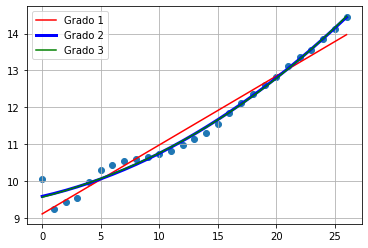

In [105]:
y_predG1 = 9.11567639 + 0.18667055*x
y_predG2 = 9.59131226e+00 + 7.25187163e-02*x + 4.39043747e-03*x**2
y_predG3 = 9.56752298e+00 + 8.46495861e-02*x + 3.20207416e-03*x**2 + 3.04659754e-05*x**3

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter (x, data)
plt.plot(x, y_predG1, "r", label="Grado 1")
plt.plot(x, y_predG2, "b", label="Grado 2",linewidth=3) #para que la se vea alrededor
plt.plot(x, y_predG3, "g", label="Grado 3")
plt.legend()
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [106]:
import pandas as pd
data=pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


1. Usando los años como variable independiente  𝑥  y la población como variable dependiente  𝑦 , ajustar polinomios de grado 1 hasta grado 3. 

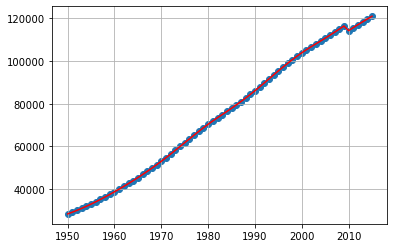

In [107]:
x=np.array(data["Year"])
y=np.array(data["Poblacion"])

plt.figure()
plt.scatter(x, y)
plt.plot(x, y, "r" )
plt.grid()

In [108]:
#Definimos un modelo f(x) = B0 + B1*x
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1]) #porque beta es tiene 2 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna


X_G1 = np.hstack((ones, x_1)) #amontonar en la matriz X (stack) en horizontal (h)
X_G1

array([[1.000e+00, 1.950e+03],
       [1.000e+00, 1.951e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.953e+03],
       [1.000e+00, 1.954e+03],
       [1.000e+00, 1.955e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.957e+03],
       [1.000e+00, 1.958e+03],
       [1.000e+00, 1.959e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.961e+03],
       [1.000e+00, 1.962e+03],
       [1.000e+00, 1.963e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.965e+03],
       [1.000e+00, 1.966e+03],
       [1.000e+00, 1.967e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.969e+03],
       [1.000e+00, 1.970e+03],
       [1.000e+00, 1.971e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.973e+03],
       [1.000e+00, 1.974e+03],
       [1.000e+00, 1.975e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.977e+03],
       [1.000e+00, 1.978e+03],
       [1.000e+00, 1.979e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.981e+03],
       [

In [109]:
beta_inicial_G1 = np.random.rand(2) #vector aleatorio de 2 porque beta tiene 4 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo(beta_inicial_G1, X_G1, y)

419064319387.62524

In [110]:
import scipy.optimize as opt
sol_G1 = opt.minimize(funcion_de_costo,
                  beta_inicial_G1,
                  args=(X_G1, y))
sol_G1

      fun: 212137173.41377202
 hess_inv: array([[ 5.40511710e+01, -2.72616154e-02],
       [-2.72616154e-02,  1.37517590e-05]])
      jac: array([-2.00e+00, -3.94e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 156
      nit: 10
     njev: 48
   status: 2
  success: False
        x: array([-2.98658498e+06,  1.54396071e+03])

In [111]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2
def funcion_de_costo2(beta, X, y):
    beta = np.reshape(beta, [3, -1]) #porque beta es tiene 3 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(y), -1])

X_G2 = np.hstack((ones, x_1, x_2)) #amontonar en la matriz X (stack) en horizontal (h)
X_G2

array([[1.000000e+00, 1.950000e+03, 3.802500e+06],
       [1.000000e+00, 1.951000e+03, 3.806401e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.954000e+03, 3.818116e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 1.957000e+03, 3.829849e+06],
       [1.000000e+00, 1.958000e+03, 3.833764e+06],
       [1.000000e+00, 1.959000e+03, 3.837681e+06],
       [1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06],
       [1.000000e+00, 1.962000e+03, 3.849444e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06],
       [1.000000e+00, 1.964000e+03, 3.857296e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.966000e+03, 3.865156e+06],
       [1.000000e+00, 1.967000e+03, 3.869089e+06],
       [1.000000e+00, 1.968000e+03, 3.873024e+06],
       [1.000000e+00, 1.969000e

In [112]:
beta_inicial_G2 = np.random.rand(3) #vector aleatorio de 3 porque beta tiene 4 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo2(beta_inicial_G2, X_G2, y)

288046800495303.4

In [113]:
import scipy.optimize as opt
sol_G2 = opt.minimize(funcion_de_costo2,
                  beta_inicial_G2,
                  args=(X_G2, y))
sol_G2

      fun: 211547355.1095679
 hess_inv: array([[ 2.00327548e+06, -2.02097950e+03,  5.09641186e-01],
       [-2.02097951e+03,  2.03886086e+00, -5.14155684e-04],
       [ 5.09641188e-01, -5.14155683e-04,  1.29660035e-07]])
      jac: array([1.12140000e+04, 2.22353580e+07, 4.41038346e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 9
     njev: 53
   status: 2
  success: False
        x: array([-8.20544200e+05, -6.41340343e+02,  5.51153876e-01])

In [114]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2 + B1*x**3
def funcion_de_costo3(beta, X, y):
    beta = np.reshape(beta, [4, -1]) #porque beta es tiene 4 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(y), -1])
x_3 = np.reshape(x**3, [len(y), -1])

X_G3 = np.hstack((ones, x_1, x_2, x_3)) #amontonar en la matriz X (stack) en horizontal (h)
X_G3

array([[1.00000000e+00, 1.95000000e+03, 3.80250000e+06, 7.41487500e+09],
       [1.00000000e+00, 1.95100000e+03, 3.80640100e+06, 7.42628835e+09],
       [1.00000000e+00, 1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.00000000e+00, 1.95300000e+03, 3.81420900e+06, 7.44915018e+09],
       [1.00000000e+00, 1.95400000e+03, 3.81811600e+06, 7.46059866e+09],
       [1.00000000e+00, 1.95500000e+03, 3.82202500e+06, 7.47205888e+09],
       [1.00000000e+00, 1.95600000e+03, 3.82593600e+06, 7.48353082e+09],
       [1.00000000e+00, 1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.00000000e+00, 1.95800000e+03, 3.83376400e+06, 7.50650991e+09],
       [1.00000000e+00, 1.95900000e+03, 3.83768100e+06, 7.51801708e+09],
       [1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e

In [115]:
beta_inicial_G3 = np.random.rand(4) #vector aleatorio de 4 porque beta tiene 4 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo3(beta_inicial_G3, X_G3, y)

2.4459943350487704e+19

In [116]:
import scipy.optimize as opt
sol_G3 = opt.minimize(funcion_de_costo3,
                  beta_inicial_G3,
                  args=(X_G3, y))
sol_G3

      fun: 2504705414.231513
 hess_inv: array([[ 1.00000000e+00, -7.73129003e-10, -7.69704499e-07,
         3.88070805e-10],
       [-7.73129003e-10,  9.99998985e-01, -1.00881074e-03,
         2.54615112e-07],
       [-7.69704499e-07, -1.00881074e-03,  1.01770605e-06,
        -2.56861699e-10],
       [ 3.88070805e-10,  2.54615112e-07, -2.56861699e-10,
         6.48304236e-14]])
      jac: array([1.73440000e+04, 1.95612800e+07, 9.45920442e+09, 2.03812380e+13])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 337
      nit: 2
     njev: 65
   status: 2
  success: False
        x: array([ 3.63213801e-01,  2.06592653e-01, -5.66514534e-01,  2.95204328e-04])

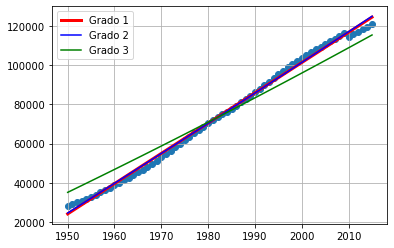

In [123]:
y_predG1 = -2.98658498e+06 + 1.54396071e+03*x
y_predG2 = -8.20544200e+05 - 6.41340343e+02*x + 5.51153876e-01*x**2
y_predG3 = 3.63213801e-01 + 2.06592653e-01*x - 5.66514534e-01*x**2 + 2.95204328e-04*x**3

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter (x, y)
plt.plot(x, y_predG1, "r", label="Grado 1", linewidth=3)
plt.plot(x, y_predG2, "b", label="Grado 2")
plt.plot(x, y_predG3, "g", label="Grado 3")
plt.legend()
plt.grid()

2. Repetir el punto 1 usando los nacimientos como variable dependiente  𝑦 . Grafique las curvas ajustadas junto con los datos de nacimientos.

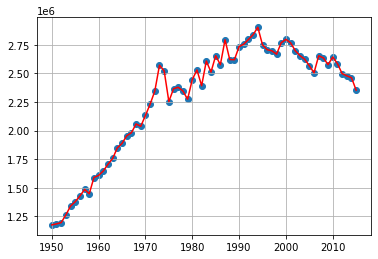

In [135]:
x=np.array(data["Year"])
y=np.array(data["Nacimientos"])

plt.figure()
plt.scatter(x, y)
plt.plot(x, y, "r" )
plt.grid()

In [136]:
#Definimos un modelo f(x) = B0 + B1*x
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1]) #porque beta es tiene 2 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna


X_G1 = np.hstack((ones, x_1)) #amontonar en la matriz X (stack) en horizontal (h)
X_G1

array([[1.000e+00, 1.950e+03],
       [1.000e+00, 1.951e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.953e+03],
       [1.000e+00, 1.954e+03],
       [1.000e+00, 1.955e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.957e+03],
       [1.000e+00, 1.958e+03],
       [1.000e+00, 1.959e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.961e+03],
       [1.000e+00, 1.962e+03],
       [1.000e+00, 1.963e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.965e+03],
       [1.000e+00, 1.966e+03],
       [1.000e+00, 1.967e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.969e+03],
       [1.000e+00, 1.970e+03],
       [1.000e+00, 1.971e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.973e+03],
       [1.000e+00, 1.974e+03],
       [1.000e+00, 1.975e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.977e+03],
       [1.000e+00, 1.978e+03],
       [1.000e+00, 1.979e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.981e+03],
       [

In [137]:
beta_inicial_G1 = np.random.rand(2) #vector aleatorio de 2 porque beta tiene 2 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo(beta_inicial_G1, X_G1, y)

358525635596972.25

In [138]:
import scipy.optimize as opt
sol_G1 = opt.minimize(funcion_de_costo,
                  beta_inicial_G1,
                  args=(X_G1, y))
sol_G1

      fun: 4750533499774.645
 hess_inv: array([[6.82601822e-13, 4.54747351e-13],
       [4.54747351e-13, 1.29045430e-09]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 159
      nit: 12
     njev: 53
   status: 0
  success: True
        x: array([-3.98517700e+07,  2.12505054e+04])

In [139]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2
def funcion_de_costo2(beta, X, y):
    beta = np.reshape(beta, [3, -1]) #porque beta es tiene 3 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(y), -1])

X_G2 = np.hstack((ones, x_1, x_2)) #amontonar en la matriz X (stack) en horizontal (h)
X_G2

array([[1.000000e+00, 1.950000e+03, 3.802500e+06],
       [1.000000e+00, 1.951000e+03, 3.806401e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.954000e+03, 3.818116e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 1.957000e+03, 3.829849e+06],
       [1.000000e+00, 1.958000e+03, 3.833764e+06],
       [1.000000e+00, 1.959000e+03, 3.837681e+06],
       [1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06],
       [1.000000e+00, 1.962000e+03, 3.849444e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06],
       [1.000000e+00, 1.964000e+03, 3.857296e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.966000e+03, 3.865156e+06],
       [1.000000e+00, 1.967000e+03, 3.869089e+06],
       [1.000000e+00, 1.968000e+03, 3.873024e+06],
       [1.000000e+00, 1.969000e

In [140]:
beta_inicial_G2 = np.random.rand(3) #vector aleatorio de 3 porque beta tiene 4 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo2(beta_inicial_G2, X_G2, y)

65603560019152.78

In [141]:
import scipy.optimize as opt
sol_G2 = opt.minimize(funcion_de_costo2,
                  beta_inicial_G2,
                  args=(X_G2, y))
sol_G2

      fun: 4852466507200.844
 hess_inv: array([[ 1.22052005e+00, -7.21644966e-15, -3.09200098e-07],
       [-7.21644966e-15,  3.33066907e-16, -1.62630326e-19],
       [-3.09200098e-07, -1.62630326e-19,  8.08881454e-14]])
      jac: array([        0.,         0., -22216704.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 262
      nit: 5
     njev: 63
   status: 2
  success: False
        x: array([-8.55136621e+03, -1.95576097e+04,  1.04457426e+01])

In [142]:
#Definimos un modelo f(x) = B0 + B1*x + B1*x**2 + B1*x**3
def funcion_de_costo3(beta, X, y):
    beta = np.reshape(beta, [4, -1]) #porque beta es tiene 4 elementos, el -1 es para siempre
    pred = X @ beta  #@ es para que se haga la multiplicacion respetando algebra lineal 
    costo = (y-pred).T @ (y-pred)
    return costo[0][0] #para quitar los corchetes en la respuesta

# Construyendo matriz X 
ones = np.ones([len(y), 1]) # m renglones y 1 columna de unos
x_1 = np.reshape(x, [len(y), -1]) # columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [len(y), -1])
x_3 = np.reshape(x**3, [len(y), -1])

X_G3 = np.hstack((ones, x_1, x_2, x_3)) #amontonar en la matriz X (stack) en horizontal (h)
X_G3

array([[1.00000000e+00, 1.95000000e+03, 3.80250000e+06, 7.41487500e+09],
       [1.00000000e+00, 1.95100000e+03, 3.80640100e+06, 7.42628835e+09],
       [1.00000000e+00, 1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.00000000e+00, 1.95300000e+03, 3.81420900e+06, 7.44915018e+09],
       [1.00000000e+00, 1.95400000e+03, 3.81811600e+06, 7.46059866e+09],
       [1.00000000e+00, 1.95500000e+03, 3.82202500e+06, 7.47205888e+09],
       [1.00000000e+00, 1.95600000e+03, 3.82593600e+06, 7.48353082e+09],
       [1.00000000e+00, 1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.00000000e+00, 1.95800000e+03, 3.83376400e+06, 7.50650991e+09],
       [1.00000000e+00, 1.95900000e+03, 3.83768100e+06, 7.51801708e+09],
       [1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e

In [143]:
beta_inicial_G3 = np.random.rand(4) #vector aleatorio de 4 porque beta tiene 4 elementos
y = np.reshape(y, [len(y), -1])
funcion_de_costo3(beta_inicial_G3, X_G3, y)

4.421784859985251e+20

In [144]:
import scipy.optimize as opt
sol_G3 = opt.minimize(funcion_de_costo3,
                  beta_inicial_G3,
                  args=(X_G3, y))
sol_G3

      fun: 660704960640.4601
 hess_inv: array([[ 9.99993400e-01, -2.16571680e-03,  1.35083411e-06,
        -1.30487994e-10],
       [-2.16742093e-03,  1.23575125e-01, -1.24657579e-04,
         3.14360858e-08],
       [ 1.35255455e-06, -1.24657606e-04,  1.25755553e-07,
        -3.17144876e-11],
       [-1.30922128e-10,  3.14360996e-08, -3.17144946e-11,
         7.99850942e-15]])
      jac: array([0.00000000e+00, 8.58891059e+09, 1.70228525e+13, 3.37640943e+16])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 302
      nit: 5
     njev: 58
   status: 2
  success: False
        x: array([ 2.05580638e+04, -1.83199115e+06,  1.83903852e+03, -4.61180950e-01])

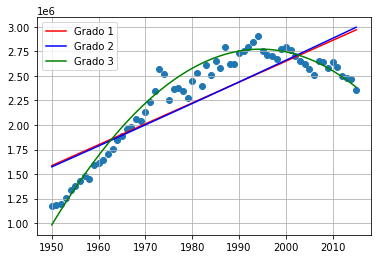

In [145]:
y_predG1 = -3.98517700e+07 + 2.12505054e+04*x
y_predG2 = -8.55136621e+03 - 1.95576097e+04*x + 1.04457426e+01*x**2
y_predG3 = 2.05580638e+04 - 1.83199115e+06*x + 1.83903852e+03*x**2 - 4.61180950e-01*x**3

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter (x, y)
plt.plot(x, y_predG1, "r", label="Grado 1")
plt.plot(x, y_predG2, "b", label="Grado 2")
plt.plot(x, y_predG3, "g", label="Grado 3")
plt.legend()
plt.grid()